In [3]:
import tensorflow as tf
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
tf.reset_default_graph()

First value, a line composed of 100 evenly spaced datapoints ranging from -1 to 1 ([here](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html))

In [6]:
trX = np.linspace(-1, 1, 100)

In [7]:
trX

array([-1.        , -0.97979798, -0.95959596, -0.93939394, -0.91919192,
       -0.8989899 , -0.87878788, -0.85858586, -0.83838384, -0.81818182,
       -0.7979798 , -0.77777778, -0.75757576, -0.73737374, -0.71717172,
       -0.6969697 , -0.67676768, -0.65656566, -0.63636364, -0.61616162,
       -0.5959596 , -0.57575758, -0.55555556, -0.53535354, -0.51515152,
       -0.49494949, -0.47474747, -0.45454545, -0.43434343, -0.41414141,
       -0.39393939, -0.37373737, -0.35353535, -0.33333333, -0.31313131,
       -0.29292929, -0.27272727, -0.25252525, -0.23232323, -0.21212121,
       -0.19191919, -0.17171717, -0.15151515, -0.13131313, -0.11111111,
       -0.09090909, -0.07070707, -0.05050505, -0.03030303, -0.01010101,
        0.01010101,  0.03030303,  0.05050505,  0.07070707,  0.09090909,
        0.11111111,  0.13131313,  0.15151515,  0.17171717,  0.19191919,
        0.21212121,  0.23232323,  0.25252525,  0.27272727,  0.29292929,
        0.31313131,  0.33333333,  0.35353535,  0.37373737,  0.39

Create a y value which is approximately linear but with some random noise.

Pass trX as a array with the * syntax ([here](https://stackoverflow.com/a/400823)).

In [76]:
trY = 2 * trX + np.random.randn(*trX.shape) * 0.93

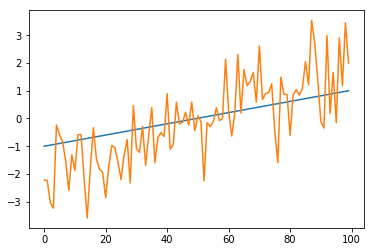

In [77]:
plt.plot(trX)
plt.plot(trY)

In [78]:
X = tf.placeholder("float") # create symbolic variables
Y = tf.placeholder("float")

def model(X, w):
    return tf.multiply(X, w) # lr is just X*w so this model line is pretty simple

w = tf.Variable(0.0, name="weights") # create a shared variable (like theano.shared) for the weight matrix
y_model = model(X, w)

cost = tf.square(Y - y_model) # use square error for cost function

train_op = tf.train.GradientDescentOptimizer(0.001).minimize(cost) # construct an optimizer to minimize cost and fit line to my data
train_op2 = tf.train.AdamOptimizer(0.001).minimize(cost)

The model tries to approximate the random-laden trY (generated through trX), and getting closer step by step.

Optimizing with Gradient Descent

1.6341848


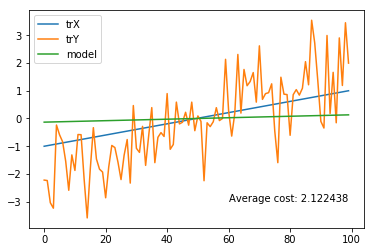

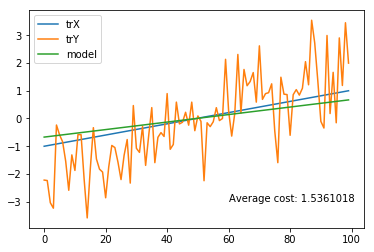

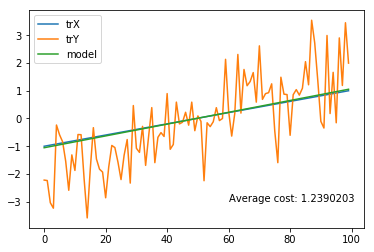

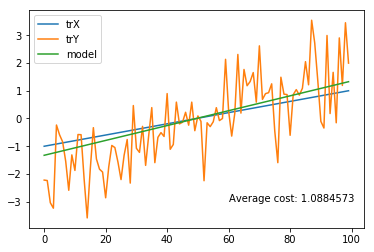

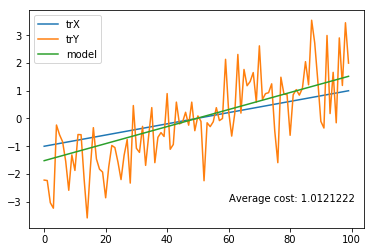

In [81]:
# Launch the graph in a session
with tf.Session() as sess:
    # you need to initialize variables (in this case just variable W)
    tf.global_variables_initializer().run()

    for i in range(25):
        for (x, y) in zip(trX, trY):
            sess.run(train_op, feed_dict={X: x, Y: y})
            
        if i % 5 == 0:  
            plt.figure()
            plt.plot(trX, label='trX')
            plt.plot(trY, label='trY')
            plt.plot(sess.run(y_model, feed_dict={X: trX, Y: trY}), label='model')
            plt.text(60, -3, 'Average cost: ' + str(tf.reduce_mean(sess.run(cost, feed_dict={X: trX, Y: trY})).eval()))
            plt.legend()

            

    print(sess.run(w))  # It should be something around 2

Optimizing with Adam

1.7509344


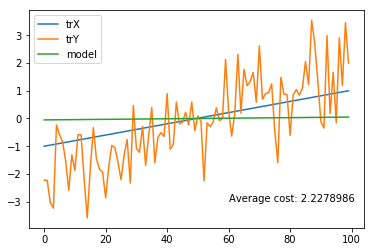

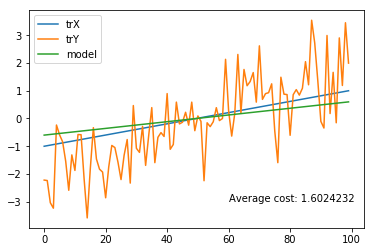

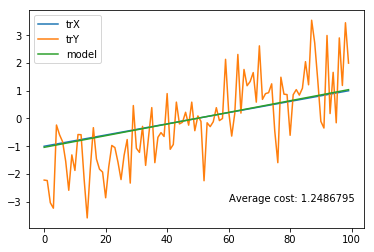

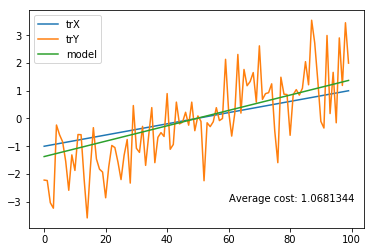

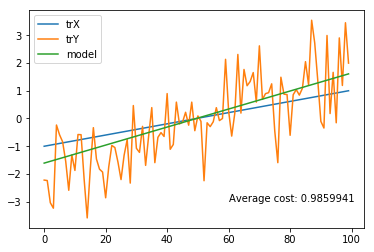

In [83]:
# Launch the graph in a session
with tf.Session() as sess:
    # you need to initialize variables (in this case just variable W)
    tf.global_variables_initializer().run()

    for i in range(50):
        for (x, y) in zip(trX, trY):
            sess.run(train_op2, feed_dict={X: x, Y: y})
            
        if i % 10 == 0:  
            plt.figure()
            plt.plot(trX, label='trX')
            plt.plot(trY, label='trY')
            plt.plot(sess.run(y_model, feed_dict={X: trX, Y: trY}), label='model')
            plt.text(60, -3, 'Average cost: ' + str(tf.reduce_mean(sess.run(cost, feed_dict={X: trX, Y: trY})).eval()))
            plt.legend()

            

    print(sess.run(w))  # It should be something around 2